# Manipulating_Time_Series_Data

## Working with Time Series in Pandas
### How to use dates & times with pandas
#### Your first time series
You have learned in the video how to create a sequence of dates using pd.date_range(). You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and day_name() for each date.

We have already imported pandas as pd for you.

1. Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. Use the arguments start and periods. Assign the result to seven_days.
2. Iterate over each date in seven_days and in each iteration, print the .dayofweek and .day_name() attributes.

In [1]:
import pandas as pd

# Create the range of dates here
seven_days = pd.date_range('2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


### Indexing & resampling time series
#### Create a time series of air quality data
You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().


We have already imported pandas as pd and matplotlib.pyplot as plt for you, and loaded the air quality DataFrame into the variable data.

- Inspect data using .info().
- Use pd.to_datetime to convert the column 'date' to dtype datetime64.
- Set the 'date' column as index.
- Validate the changes by inspecting data using .info() again.
- Plot data using subplots=True.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

while 'DATABASE' not in os.listdir():
    
    os.chdir('..')
    
    #print(' ... ready to import f_functions ...')

In [3]:
data = pd.read_csv('DATABASE/air_quality_data/nyc.csv')

# Inspect data
print(data.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [4]:
# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index("date", inplace = True)

# Inspect data 
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


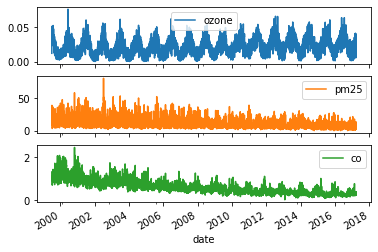

In [5]:

# Plot data
data.plot(subplots = True) ;plt.show()

#### Compare annual stock price trends
In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.


We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.

- Create an empty pd.DataFrame() called prices.
- Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
- Use the iteration variable to select the data for this year and the column price.
1. Use .reset_index() with drop=True to remove the DatetimeIndex.
2. Rename the column price column to the appropriate year.
3. Use pd.concat() to combine the yearly data with the data in prices along axis=1.
- Plot prices.

In [6]:
yahoo = pd.read_csv('DATABASE/stock_data/yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date)
yahoo

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66
...,...,...
777,2015-12-25,NaN
778,2015-12-28,33.60
779,2015-12-29,34.04
780,2015-12-30,33.37


In [7]:
yahoo  = yahoo.set_index('date')


yahoo.columns

Index(['price'], dtype='object')

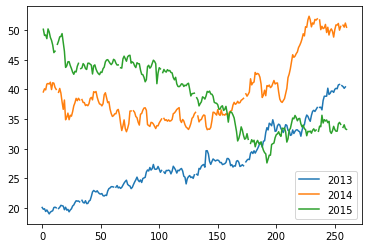

In [8]:
# Create dataframe prices here
prices = pd.DataFrame()
#yahoo = pd.read_csv('DATABASE/stock_data/yahoo.csv')

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

#### Set and change time series frequency
In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.


We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the co_cities.csv file in a variable co.

- Inspect co using .info().
- Use .asfreq() to set the frequency to calendar daily.
- Show a plot of 'co' using subplots=True.
- Change the the frequency to monthly using the alias 'M'.
- Show another plot of co using subplots=True.

In [9]:
co = pd.read_csv('DATABASE/air_quality_data/co_cities.csv')
co

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761
...,...,...,...,...
1893,2010-12-27,0.510417,0.669384,0.414583
1894,2010-12-28,0.479166,0.669129,0.425278
1895,2010-12-29,0.460417,0.291757,0.400924
1896,2010-12-30,0.364772,0.101042,0.744792


In [10]:
# Inspect data
print(co.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   object 
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB
None


In [11]:
co = co.set_index('date')
co

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761
...,...,...,...
2010-12-27,0.510417,0.669384,0.414583
2010-12-28,0.479166,0.669129,0.425278
2010-12-29,0.460417,0.291757,0.400924


In [12]:
# Set the frequency to calendar daily
co.asfreq('D')


,Chicago,Los Angeles,New York
date,,,
2005-01-01,NaN,NaN,NaN
2005-01-02,NaN,NaN,NaN
2005-01-03,NaN,NaN,NaN
2005-01-04,NaN,NaN,NaN
2005-01-05,NaN,NaN,NaN
...,...,...,...
2010-12-27,NaN,NaN,NaN
2010-12-28,NaN,NaN,NaN
2010-12-29,NaN,NaN,NaN


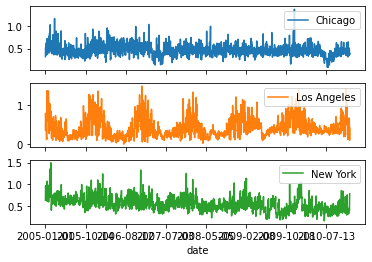

In [13]:



# Plot the data
co.plot(subplots = True)

plt.show()


In [17]:

# Set frequency to monthly
co.asfreq('M')


,Chicago,Los Angeles,New York
date,,,
2005-01-31,NaN,NaN,NaN
2005-02-28,NaN,NaN,NaN
2005-03-31,NaN,NaN,NaN
2005-04-30,NaN,NaN,NaN
2005-05-31,NaN,NaN,NaN
...,...,...,...
2010-08-31,NaN,NaN,NaN
2010-09-30,NaN,NaN,NaN
2010-10-31,NaN,NaN,NaN


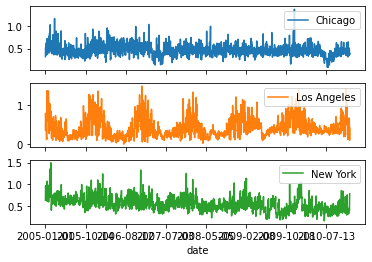

In [22]:

# Plot the data

co.plot(subplots = True)

plt.show()

### Lags, changes, and returns for stock price series


- `.shift()`: it allows to move all data into the past or future. Default = 1. +: Future; -: Past



In [31]:
google = pd.read_csv('DATABASE/stock_data/google.csv', parse_dates = ['Date'], index_col  ='Date')
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [32]:
google['shifted'] = google.Close.shift()
google.head()

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN


In [33]:
google['lagged'] = google.Close.shift(-1)
google.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,NaN
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,558.10
2014-01-06,558.10,NaN,568.86


- `.div()`: it allows to divide a series by a value or an entire series. 

In [35]:
google['change'] = google.Close.div(google.shifted)
google

,Close,shifted,lagged,change
Date,,,,
2014-01-02,556.00,NaN,551.95,NaN
2014-01-03,551.95,556.00,NaN,0.992716
2014-01-04,NaN,551.95,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN
2014-01-06,558.10,NaN,568.86,NaN
...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN
2016-12-27,791.55,NaN,785.05,NaN
2016-12-28,785.05,791.55,782.79,0.991788


Calculate one-period percent change

In [37]:
google['return'] = google.change.sub(1).mul(100) # obtaininng relative change in percentage 
google

,Close,shifted,lagged,change,return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN
...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN
2016-12-27,791.55,NaN,785.05,NaN,NaN
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174


- `.diff()`: diffeence in value for two periods

In [39]:
google['diff'] = google.Close.diff()
google

,Close,shifted,lagged,change,return,diff
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN
...,...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN,NaN
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50


-`.pct_change()`: percent change for 2 periods

In [43]:
google['pct_change'] = google.Close.pct_change().mul(100)
google

,Close,shifted,lagged,change,return,diff,pct_change
Date,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN,1.114231
...,...,...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN,NaN,0.000000
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN,0.207619
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50,-0.821174


Calculating datapoints in several dates appart 

In [47]:
google['return_2'] = google.Close.pct_change(periods = 2).mul(100)
google

,Close,shifted,lagged,change,return,diff,pct_change,return_2
Date,,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417,NaN
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000,-0.728417
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000,0.000000
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN,1.114231,1.114231
...,...,...,...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN,NaN,0.000000,0.000000
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN,0.207619,0.207619
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50,-0.821174,-0.615260


#### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

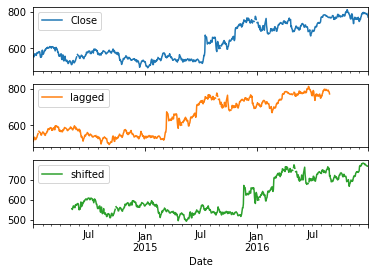

In [52]:
# Import data here
google = pd.read_csv('DATABASE/stock_data/google.csv', parse_dates = ['Date'], index_col  ='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

# Plot the google price series
google.plot(subplots = True)
plt.show()

#### Calculating stock price changes
You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().


We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to yahoo.

1. Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
2. Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
2. Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
4. Inspect the last five rows of yahoo to verify the calculation.
5. Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of the result to show both columns are equal.


In [54]:
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [56]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

yahoo

,price,shifted_30,change_30,diff_30
date,,,,
2013-01-02,20.08,NaN,NaN,NaN
2013-01-03,19.78,NaN,NaN,NaN
2013-01-04,19.86,NaN,NaN,NaN
2013-01-07,19.40,NaN,NaN,NaN
2013-01-08,19.66,NaN,NaN,NaN
...,...,...,...,...
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18


In [57]:
# Inspect the last five rows of price
print(yahoo.tail())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64


In [58]:
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

0.0    703
dtype: int64


#### Plotting multi-period returns
The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.


We have already imported pandas as pd, and matplotlib.pyplot as plt. We have also loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to google.

1. Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
2. Plot the result using subplots=True.

In [65]:
google = pd.read_csv('DATABASE/stock_data/google.csv', parse_dates = ['Date'], index_col  ='Date')
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [72]:
google = google.asfreq('D')
google.head()

,Close,daily_return,monthly_return,annual_return
Date,,,,
2014-01-31,589.89,NaN,NaN,NaN
2014-02-01,NaN,NaN,NaN,NaN
2014-02-02,NaN,NaN,NaN,NaN
2014-02-03,NaN,NaN,NaN,NaN
2014-02-04,NaN,NaN,NaN,NaN


In [73]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)


<Figure size 432x216 with 0 Axes>

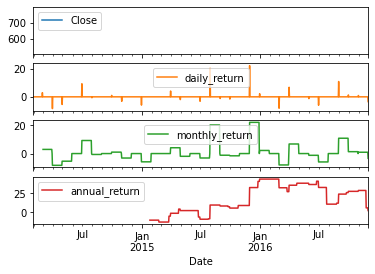

In [75]:
# Plot the result

google.plot(subplots = True)
plt.show()

In [ ]:
### Compare time series growth rates

## Basic Time Series Metrics & Resampling

## Window Functions: Rolling & Expanding Metrics


## Putting it all together: Building a value-weighted index
